In [1]:
#Importamos la librería pandas que necesitamos para la lectura, conversión y limpieza de los datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re 

#Importamos librerías necesarias para la visualización
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

In [2]:
#Abrimos el csv y lo convertimos a un DataFrame.
df_HR = pd.read_csv('df_HR_limpio.csv', index_col= 0)
df_HR.head(10)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,51,No,Unknown,684.0,6,3,Unknown,"162,0",1,M,51.0,3,5,Research Director,3,Unknown,19537.000000,6462,7,No,13,"3,0",3,0,Unknown,5,3.000000,20,15,15,1972,Yes
1,52,No,Unknown,699.0,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,Unknown,19999.000000,5678,0,Unknown,14,"3,0",1,1,"34,0",5,3.000000,33,11,9,1971,1
2,42,No,travel_rarely,532.0,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.000000,4933,1,No,11,"3,0",4,0,"22,0",3,2.766568,22,11,15,1981,1
3,47,No,travel_rarely,359.0,2,4,Medical,Unknown,1,F,82.0,3,4,Research Director,3,Married,17169.000000,26703,3,Unknown,19,"3,0",2,2,Unknown,2,2.766568,20,5,6,1976,False
5,48,No,Unknown,117.0,22,3,Medical,"1900,0",4,F,58.0,3,4,Manager,4,Unknown,17174.000000,2437,3,No,11,"3,0",2,1,Unknown,3,3.000000,22,4,7,1975,Yes
6,59,No,Unknown,1435.0,25,3,Life Sciences,"81,0",1,F,99.0,3,3,Sales Executive,1,Unknown,6463.923077,2354,7,Unknown,11,"3,0",4,0,"28,0",3,2.000000,21,7,9,1964,True
7,42,No,travel_rarely,635.0,1,1,Unknown,"387,0",2,M,99.0,3,2,Sales Executive,3,Married,6463.923077,24532,1,No,25,"4,0",3,0,"20,0",3,3.000000,20,11,6,1981,0
9,41,No,travel_frequently,840.0,9,3,Unknown,"999,0",1,M,64.0,3,5,Research Director,3,Unknown,6463.923077,3735,2,No,17,"3,0",2,1,"21,0",2,4.000000,18,0,11,1982,0
10,41,No,non-travel,247.0,7,1,Unknown,"1035,0",2,F,55.0,1,5,Research Director,3,Unknown,19973.000000,20284,1,No,22,"4,0",2,2,Unknown,3,3.000000,21,5,10,1982,0


In [3]:
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DateBirth', 'RemoteWork'],
      dtype='object')

In [4]:
# Identificar columnas categóricas y numéricas
categorical_columns = df_HR.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_columns = df_HR.select_dtypes(include=['number']).columns.tolist()

print("Columnas categóricas:", categorical_columns)
print("Columnas numéricas:", numeric_columns)

Columnas categóricas: ['Attrition', 'BusinessTravel', 'EducationField', 'EmployeeNumber', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'TotalWorkingYears', 'RemoteWork']
Columnas numéricas: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DateBirth']


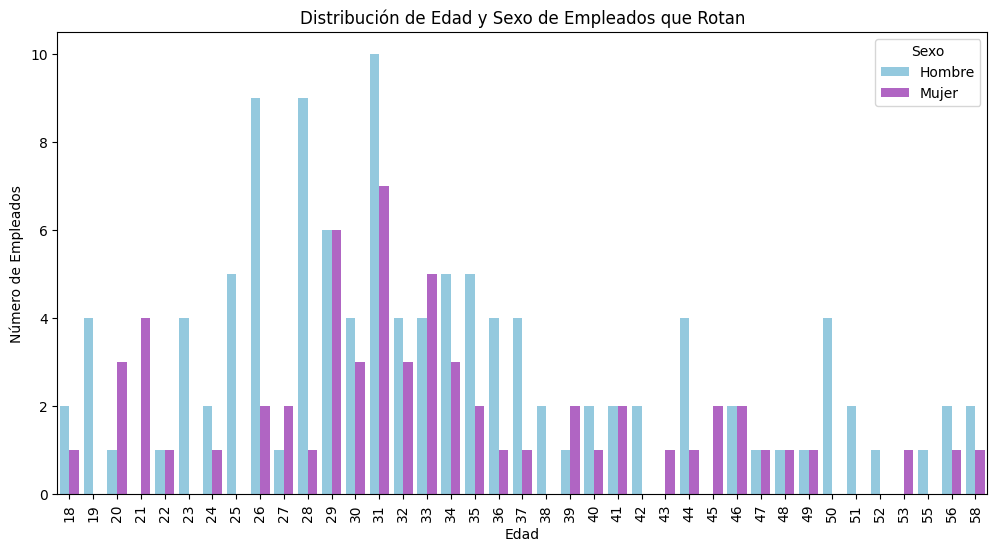

In [5]:
# Filtrar solo los empleados que han rotado 
rotating_employees = df_HR[df_HR['Attrition'] == 'Yes']

# Definir una paleta de colores personalizada
custom_palette = {'M': 'skyblue', 'F': 'mediumorchid'}

# Crear el gráfico de barras para edad y sexo de empleados que rotan
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Gender', data=rotating_employees, palette=custom_palette)
plt.title('Distribución de Edad y Sexo de Empleados que Rotan')
plt.xlabel('Edad')
plt.ylabel('Número de Empleados')
plt.legend(title='Sexo', labels=['Hombre', 'Mujer'])
plt.xticks(rotation=90)
plt.show()

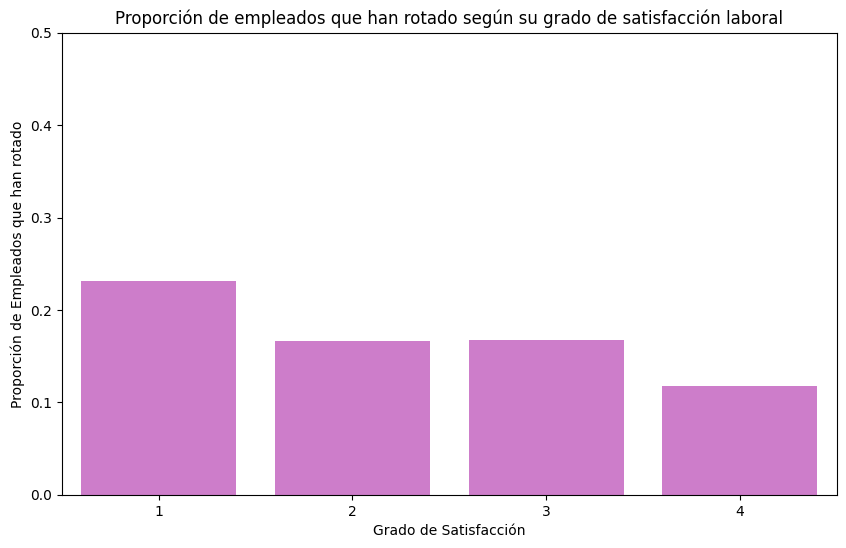

In [13]:
# Calcular la proporción de empleados que han rotado ('Yes') por cada grado de satisfacción
satisfaction_prop = df_HR.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).loc[:, 'Yes'].sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaction_prop.index, y=satisfaction_prop.values, color='orchid')
plt.title('Proporción de empleados que han rotado según su grado de satisfacción laboral')
plt.xlabel('Grado de Satisfacción')
plt.ylabel('Proporción de Empleados que han rotado')
plt.xticks(range(len(satisfaction_prop.index)), ['1', '2', '3', '4'])  # Etiquetas personalizadas para los ticks del eje x
plt.ylim(0, 0.5)  # Establecer el límite del eje y de 0 a 0.5 para mostrar la proporción
plt.show()


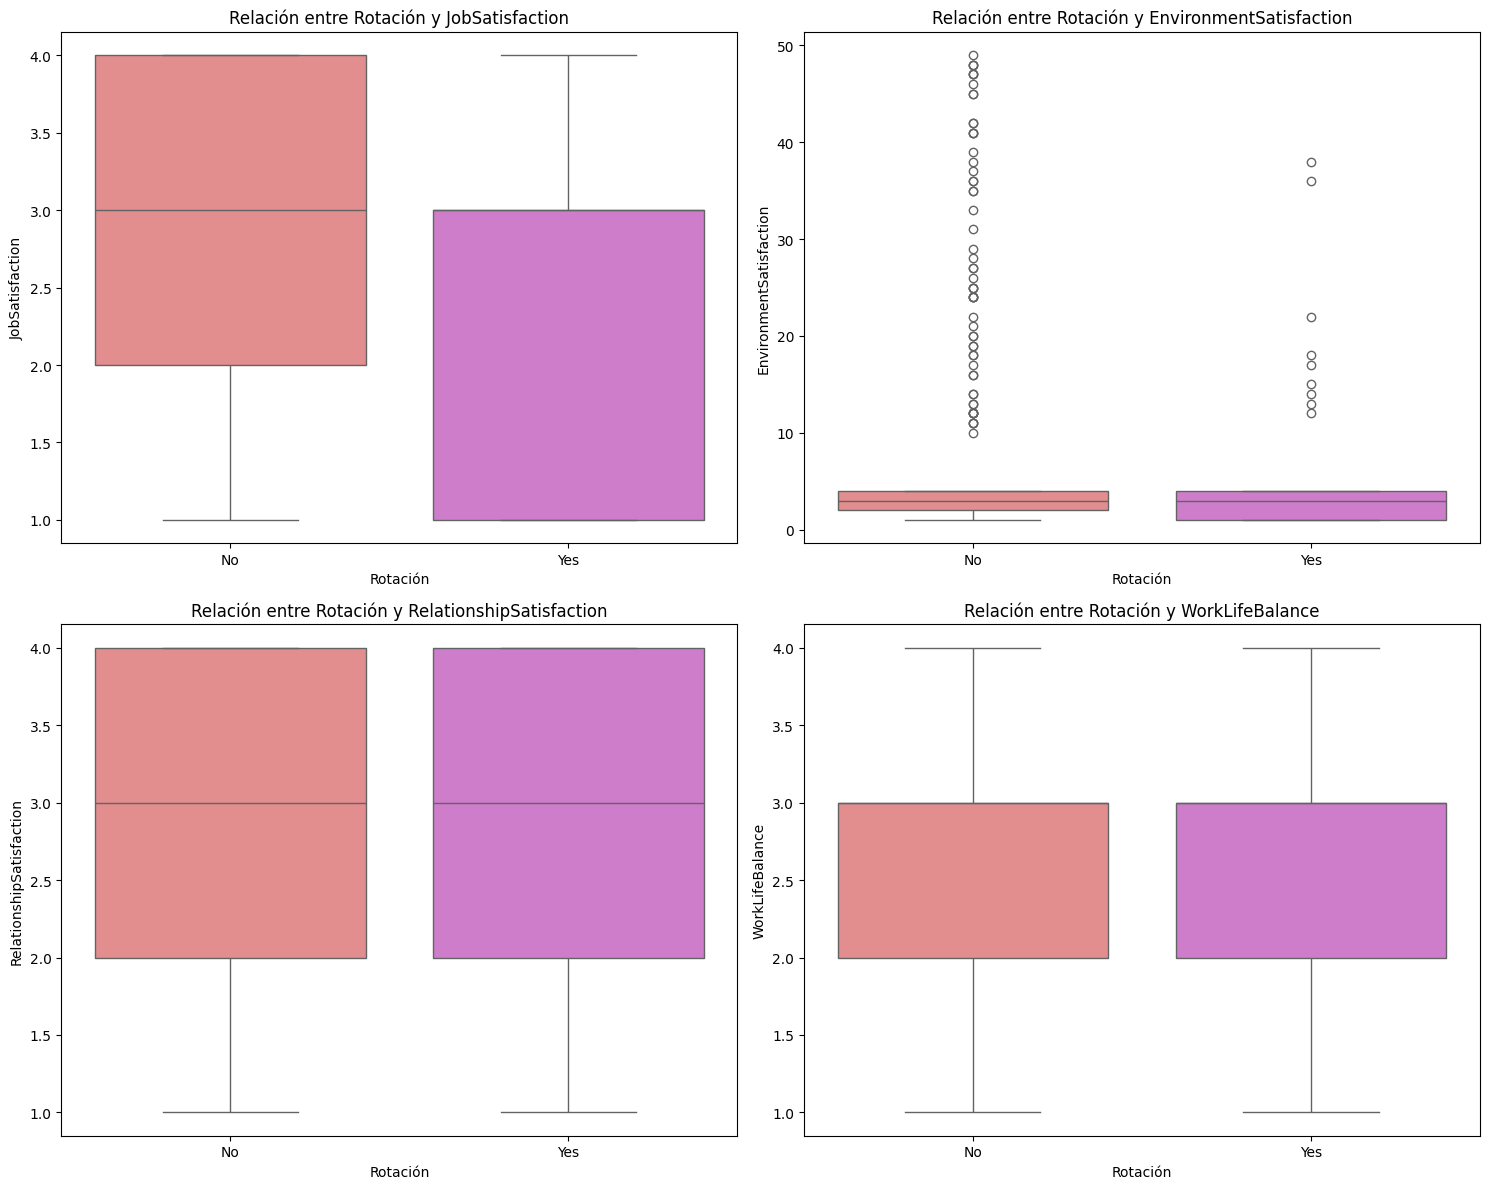

In [7]:
# Variables de satisfacción que queremos analizar
satisfaction_vars = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Definir colores personalizados
custom_colors = {'Yes': 'orchid', 'No': 'lightcoral'}

# Crear los boxplots para cada variable de satisfacción en subplots
for ax, var in zip(axes.flatten(), satisfaction_vars):
    sns.boxplot(data=df_HR, x='Attrition', y=var, ax=ax, palette=custom_colors, hue='Attrition', legend=False)
    ax.set_title(f'Relación entre Rotación y {var}')
    ax.set_xlabel('Rotación')
    ax.set_ylabel(var)

# Ajustar el layout para que no se sobrepongan los elementos
plt.tight_layout()
plt.show()

C:\Users\mgpal\AppData\Local\Temp\ipykernel_13032\243416450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_HR, palette={'Yes': 'orchid', 'No': 'lightcoral'})


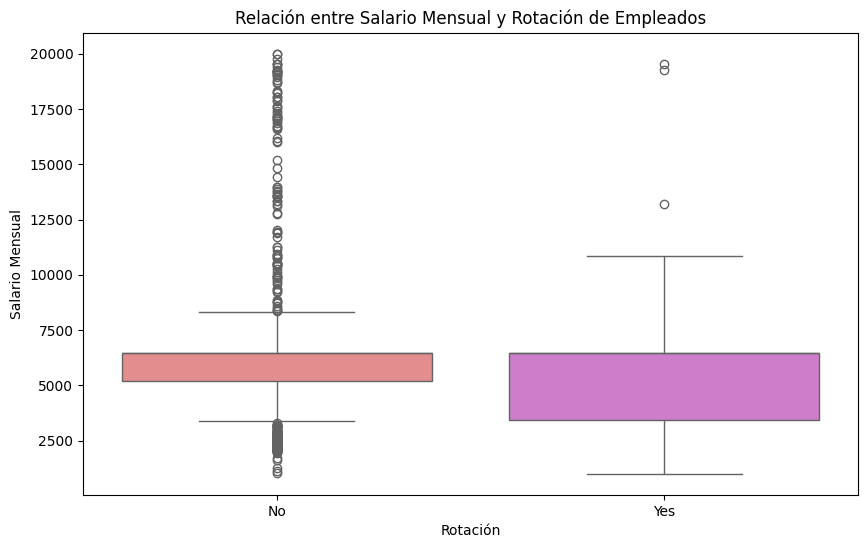

In [8]:
# Crear el gráfico de boxplot para salario vs rotación
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_HR, palette={'Yes': 'orchid', 'No': 'lightcoral'})
plt.title('Relación entre Salario Mensual y Rotación de Empleados')
plt.xlabel('Rotación')
plt.ylabel('Salario Mensual')
plt.show()

C:\Users\mgpal\AppData\Local\Temp\ipykernel_13032\1743832549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='DistanceFromHome', data=df_HR, palette={'Yes': 'orchid', 'No': 'lightcoral'})


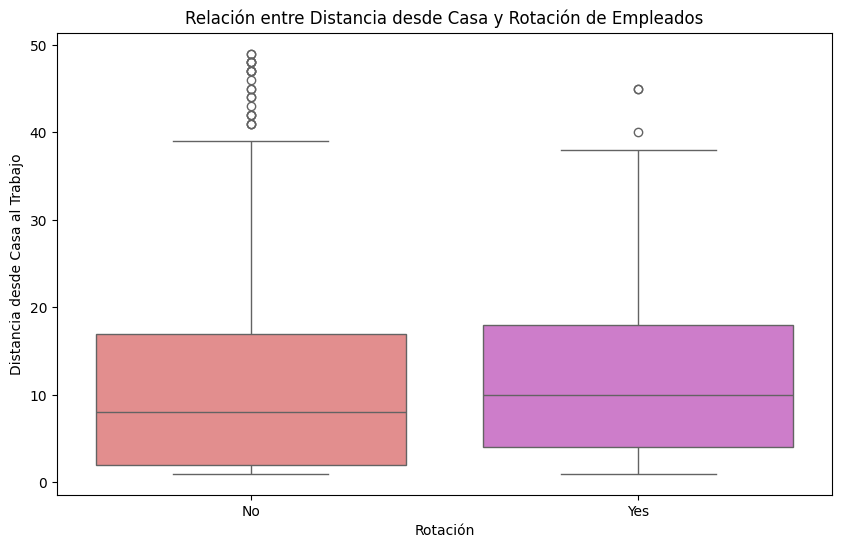

In [9]:
# Crear el gráfico de boxplot para distancia desde casa vs rotación
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df_HR, palette={'Yes': 'orchid', 'No': 'lightcoral'})
plt.title('Relación entre Distancia desde Casa y Rotación de Empleados')
plt.xlabel('Rotación')
plt.ylabel('Distancia desde Casa al Trabajo')
plt.show()